## 📚 Disciplina: Tópicos Especiais II (C318) 

### Projeto: 
Locus - Housing Pricing Calculator

### Professor: 
Ricardo Augusto

### Alunos: 
* Alexander Augusto Silva Fernandes
* Aguinaldo de Souza Júnior
* Nathalya Stefhany Pereira
* Vanessa Swerts Esteves

## 🤖 Formulação e definição do problema de Machine Learning (ML)

1. Enquadramento do problema: Aprendizagem Supervisionada;
2. Trata-se de um problema de regressão múltipla:
    * Variável de entrada: Características de um imóvel;
    * variável de saída: preço aproximado do imóvel).
3. No futuro, poderá ter mais dados entrando na aplicação, ou seja, seria necessário o ajuste dos dados pelo treinamento online; 
4. A quantidade de dados pode ser acomodada na memória (batch learning).

## 🏗️ Estrutura do Projeto de ML

### 1. Estrutura do projeto   
* Importação das bibliotecas utilizadas
* Importação da base de dados
* Manipulações iniciais nos dados

### 2. Métodos de Amostragem (Sampling)
* Método de Amostragem Aleatória Simples (Sklearn)
* Proporção da Amostragem e Representavidade

### 3. Análise Exploratória de Dados
* Visualizações dos dados
* Investigando correlações

### 4. Preparação dos Dados para Modelagem 
* Limpeza dos dados
* Manipulando features categóricas
* Transformações Customizadas
* Feature Scaling - Pipeline de transformação

### 5. Modelagem
* Mini-Exemplo de Treinamento do modelo
* Avaliação de Desempenho - Evaluation

## 1. Estrutura do Projeto

## 1.1. Importação das bibliotecas utilizadas

In [65]:
# Bibliotecas utilizadas no projeto

import os
import tarfile
import urllib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from zlib import crc32
import klib
from sklearn.model_selection import train_test_split
from pandas.plotting import scatter_matrix

import functions

## 1.2. Importação da base de dados

Este dataset foi criado coletando dados do site de imóveis [Vivareal](https://www.vivareal.com.br/).

1. id: Identificador único do imóvel;
2. type: Tipo de imóvel (Apartamento, Casa, Casa de condomínio, etc);
3. location: Endereço completo do imóvel;
4. area: Area total do imóvel (m²);
5. bedroom: Quantidade de quartos no imóvel;
6. bathroom: Quantidade de banheiros do imóvel;
7. garage: Quantidade de vagas na garagem;
8. condominium: Valor do condomínio pago no imóvel;
9. price: Preço de venda do imóvel (R$);
10. latitude: Medida do quão distante do norte está o imóvel (quanto maior, mais ao norte o imóvel está);
11. longitude: Medida do quão distante do oeste está o imóvel (quanto maior, mais a oeste o imóvel está).

In [3]:
# Importando o dataset (.csv) dentro de um dataframe pandas
df  = pd.read_csv('../datasets/vivareal.csv')

# Informações rápidas sobre o dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4836 entries, 0 to 4835
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           4836 non-null   int64  
 1   type         4836 non-null   object 
 2   location     4836 non-null   object 
 3   area         4834 non-null   object 
 4   bedroom      3987 non-null   object 
 5   bathroom     4028 non-null   object 
 6   garage       3587 non-null   object 
 7   condominium  619 non-null    object 
 8   price        4623 non-null   object 
 9   latitude     4817 non-null   float64
 10  longitude    4817 non-null   float64
dtypes: float64(2), int64(1), object(8)
memory usage: 415.7+ KB


## 1.3 Manipulações iniciais nos dados

In [4]:
# Criando um novo dataframe que contem apenas os imóveis da cidade de Poços de Caldas
df_pocos = df[(df['location'].str.contains('Poços de Caldas'))]
df_pocos.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2712 entries, 1426 to 4693
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           2712 non-null   int64  
 1   type         2712 non-null   object 
 2   location     2712 non-null   object 
 3   area         2710 non-null   object 
 4   bedroom      2284 non-null   object 
 5   bathroom     2304 non-null   object 
 6   garage       2125 non-null   object 
 7   condominium  497 non-null    object 
 8   price        2710 non-null   object 
 9   latitude     2709 non-null   float64
 10  longitude    2709 non-null   float64
dtypes: float64(2), int64(1), object(8)
memory usage: 254.2+ KB


In [5]:
# Convertendo variáveis númericas do datarfame de object para float

converter = functions.ObjectToNumber(df_pocos)

df_pocos['area'] = converter.areaToNumber()
df_pocos['bedroom'] = converter.bedroomToNumber()
df_pocos['bathroom'] = converter.bathroomToNumber()
df_pocos['garage'] = converter.garageToNumber()
df_pocos['condominium'] = converter.condominiumToNumber()
df_pocos['price'] = converter.priceToNumber()

df_pocos.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2712 entries, 1426 to 4693
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           2712 non-null   int64  
 1   type         2712 non-null   object 
 2   location     2712 non-null   object 
 3   area         2710 non-null   float64
 4   bedroom      2284 non-null   float64
 5   bathroom     2304 non-null   float64
 6   garage       2125 non-null   float64
 7   condominium  497 non-null    float64
 8   price        2710 non-null   float64
 9   latitude     2709 non-null   float64
 10  longitude    2709 non-null   float64
dtypes: float64(8), int64(1), object(2)
memory usage: 254.2+ KB


<ipython-input-5-06f2f6ca5775>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pocos['area'] = converter.areaToNumber()
<ipython-input-5-06f2f6ca5775>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pocos['bedroom'] = converter.bedroomToNumber()
<ipython-input-5-06f2f6ca5775>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs

In [6]:
# Descrição estatística do dataframe Pandas
df_stats = df_pocos.describe()
df_stats

,id,area,bedroom,bathroom,garage,condominium,price,latitude,longitude
count,2.712000e+03,2.710000e+03,2284.000000,2304.000000,2125.000000,497.000000,2.710000e+03,2709.000000,2709.000000
mean,2.490785e+09,2.386523e+04,2.615149,1.922309,2.029647,3583.593561,5.576502e+05,-21.708096,-46.262234
std,2.360661e+08,1.012329e+06,0.896461,1.287755,1.658899,41472.720251,1.006638e+06,5.910862,4.268142
min,7.095890e+07,0.000000e+00,1.000000,1.000000,1.000000,1.000000,7.500000e+02,-33.041126,-99.188642
25%,2.503301e+09,7.200000e+01,2.000000,1.000000,1.000000,150.000000,2.500000e+05,-22.118815,-46.587752
50%,2.522423e+09,1.140000e+02,3.000000,2.000000,2.000000,240.000000,3.600000e+05,-21.808696,-46.576769
75%,2.535319e+09,2.400000e+02,3.000000,2.000000,2.000000,400.000000,5.950000e+05,-21.808696,-46.576769
max,2.538954e+09,5.241111e+07,26.000000,26.000000,24.000000,650000.000000,2.650000e+07,45.770259,8.543312


### Baseado nos dados estatísticos acima, podemos observar os seguintes exemplos:
* 25% dos imóveis possuem 2 quartos, 1 banheiro, 1 vaga na garagem e 72 m² de area total 
* 50% dos imóveis possuem 3 quartos, 2 banheiros, 2 vagas na garagem e 114 m² de area total 
* 75% dos imóveis possuem 3 quartos, 2 banheiros, 2 vagas na garagem e 254 m² de area total

In [7]:
# Verificando a variável categórica type
property_types = df_pocos["type"].value_counts()
property_types

Apartamento                1326
Casa                        909
Lote/Terreno                390
Chácara                      21
Fazenda/Sítio/Chácara        16
Sala/Conjunto                14
Galpão/Depósito/Armazém      13
Cobertura                     7
Ponto                         7
Sobrado                       2
Flat                          2
Portal                        2
Imóvel                        1
Prédio/Edificio               1
Hotel/Motel/Pousada           1
Name: type, dtype: int64

In [8]:
# Pegando apenas os imóveis que tem tipo igual a Casa ou Apartamento
df_pocos = df_pocos[(df_pocos['type'] == 'Casa') | (df_pocos['type'] == 'Apartamento')]
df_pocos["type"].value_counts()

Apartamento    1326
Casa            909
Name: type, dtype: int64

<ipython-input-21-f7060a74f086>:6: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  df_pocos.hist(ax=ax, bins = 40)


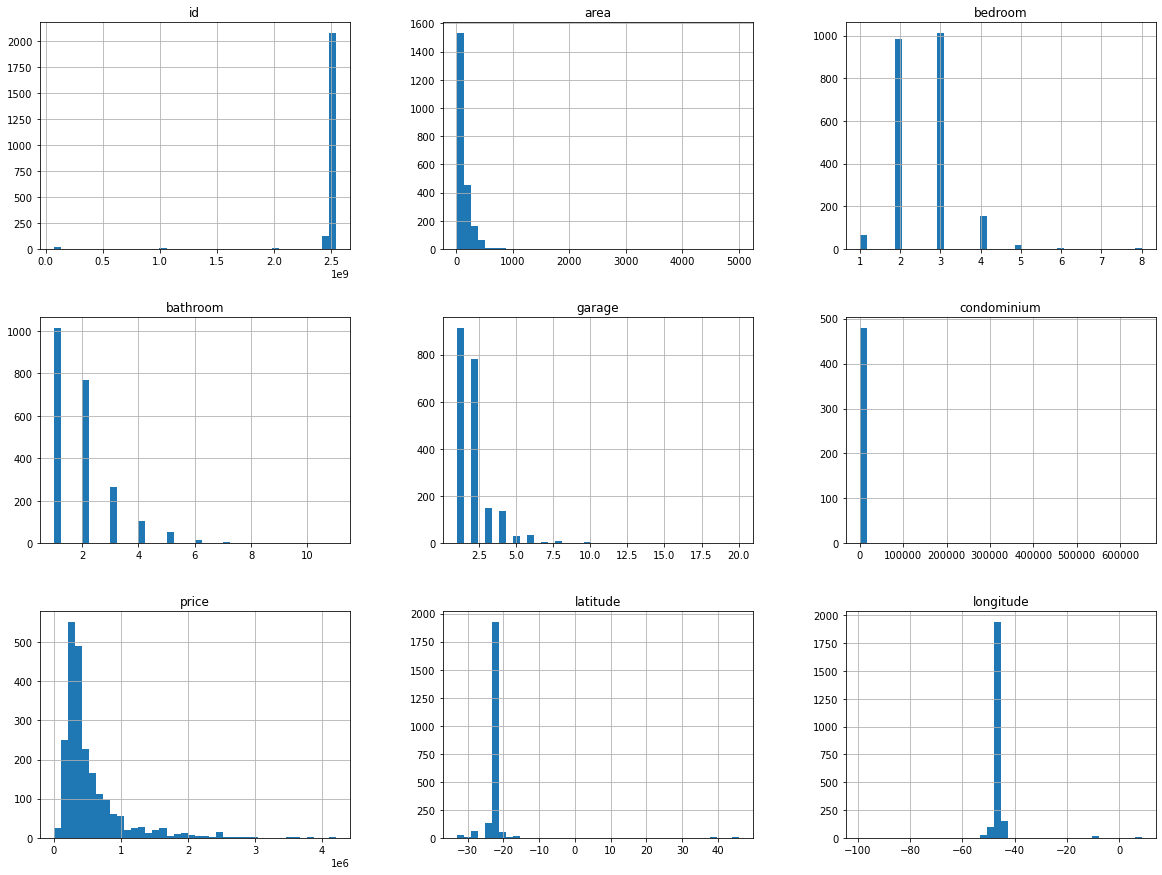

<AxesSubplot:xlabel='garage', ylabel='Density'>

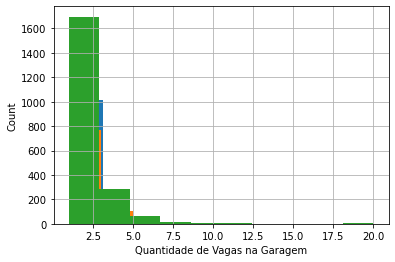

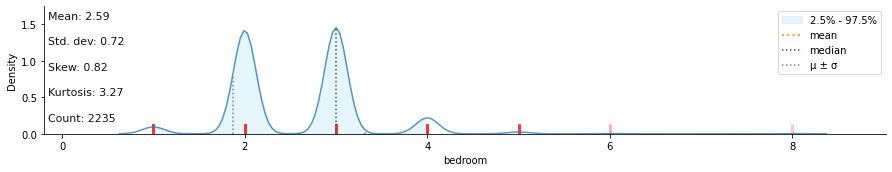

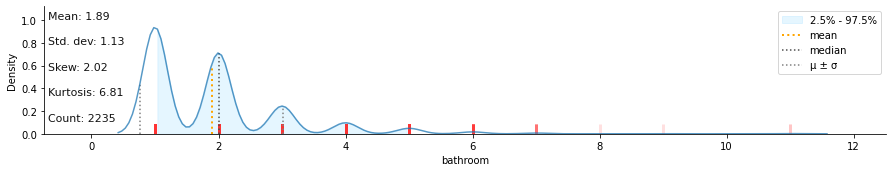

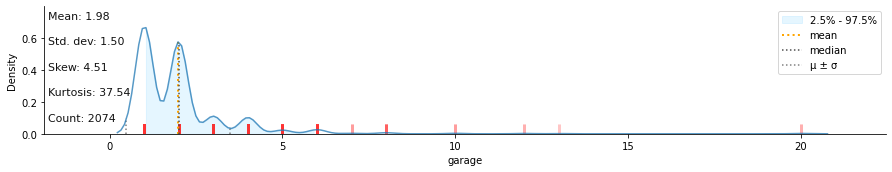

In [21]:
# Configurações relacionadas ao tamanho dos gráficos
fig = plt.figure(figsize = (20,15))
ax = fig.gca()

# Visualizando histogramas de todas as variáveis do dataframe
df_pocos.hist(ax=ax, bins = 40)
plt.show()

# Visualizando histogramas das variáveis (features) do dataframe
df_pocos['bedroom'].hist()
plt.xlabel('Quantidade de Quartos')
plt.ylabel('Count')

df_pocos['bathroom'].hist()
plt.xlabel('Quantidade de Banheiros')
plt.ylabel('Count')

df_pocos['garage'].hist()
plt.xlabel('Quantidade de Vagas na Garagem')
plt.ylabel('Count')

# Plotando os gráficos utilizando a biblioteca klib
klib.dist_plot(df_pocos['bedroom'])
klib.dist_plot(df_pocos['bathroom'])
klib.dist_plot(df_pocos['garage'])

## 2. Métodos de Amostragem (Sampling)

## 2.1. Método de Amostragem Aleatória Simples (Scikit-Learn)

In [10]:
# Criação de conjuntos de dados de treino e teste
train_set, test_set = train_test_split(df_pocos, test_size = 0.2, random_state = 42)
print(train_set.info())
print(test_set.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1788 entries, 3176 to 2667
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           1788 non-null   int64  
 1   type         1788 non-null   object 
 2   location     1788 non-null   object 
 3   area         1788 non-null   float64
 4   bedroom      1788 non-null   float64
 5   bathroom     1788 non-null   float64
 6   garage       1661 non-null   float64
 7   condominium  398 non-null    float64
 8   price        1788 non-null   float64
 9   latitude     1787 non-null   float64
 10  longitude    1787 non-null   float64
dtypes: float64(8), int64(1), object(2)
memory usage: 167.6+ KB
None
<class 'pandas.core.frame.DataFrame'>
Int64Index: 447 entries, 4488 to 4598
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           447 non-null    int64  
 1   type         447 non-null    object

2.2. Proporção da Amostragem e Representavidade

## 3. Análise Exploratória de Dados

3.1. Visualizações dos dados

No handles with labels found to put in legend.


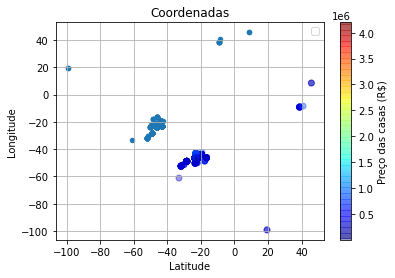

In [49]:
# Copiando os dados de treino para um dataframe pandas
train_set_df = pd.DataFrame(train_set)

# Criando gráfico de dispersão para visualização dos dados de treino (latitude e longitude)
train_set_df.plot(kind = 'scatter', x = 'longitude', y = 'latitude')

x = train_set_df['latitude']
y = train_set_df['longitude']

prices  = train_set_df['price']
scatter = plt.scatter(x, y, alpha = 0.4, c = prices, cmap='jet')

plt.xlabel('Latitude')
plt.ylabel('Longitude')
plt.title('Coordenadas')
plt.colorbar(label='Preço das casas (R$)')
plt.grid()
plt.legend()


3.1. Investigando correlações

In [51]:
# Criando a matriz de correlação das features do dataframe
correlation_matrix = train_set_df.corr()
correlation_matrix

,id,area,bedroom,bathroom,garage,condominium,price,latitude,longitude
id,1.000000,0.018020,-0.001446,-0.005986,0.035775,0.014799,0.007396,0.008981,0.002350
area,0.018020,1.000000,0.447675,0.366089,0.501445,0.028515,0.502783,-0.004698,-0.004550
bedroom,-0.001446,0.447675,1.000000,0.495185,0.435091,0.103942,0.566592,-0.012248,-0.000177
bathroom,-0.005986,0.366089,0.495185,1.000000,0.416932,0.040961,0.618355,0.000253,-0.000250
garage,0.035775,0.501445,0.435091,0.416932,1.000000,0.025884,0.528112,0.018582,0.000027
condominium,0.014799,0.028515,0.103942,0.040961,0.025884,1.000000,0.037250,-0.000967,-0.007871
price,0.007396,0.502783,0.566592,0.618355,0.528112,0.037250,1.000000,-0.008520,-0.005600
latitude,0.008981,-0.004698,-0.012248,0.000253,0.018582,-0.000967,-0.008520,1.000000,0.675821
longitude,0.002350,-0.004550,-0.000177,-0.000250,0.000027,-0.007871,-0.005600,0.675821,1.000000


Displaying positive correlations. Specify a positive "threshold" to limit the results further.


<AxesSubplot:title={'center':'Feature-correlation (pearson)'}>

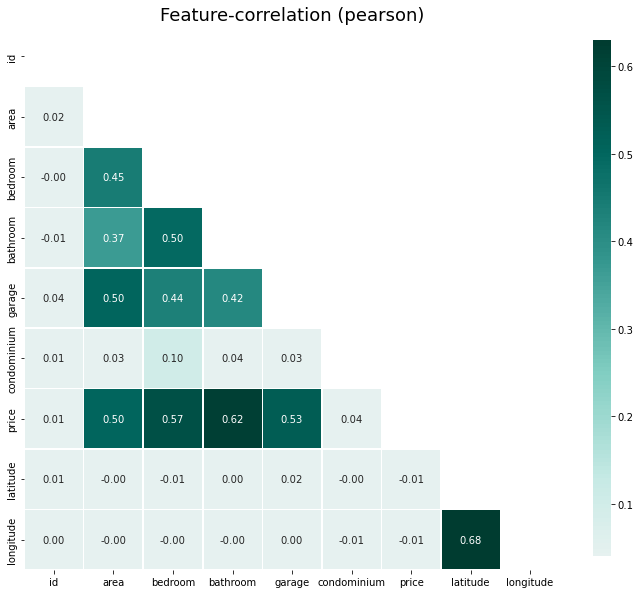

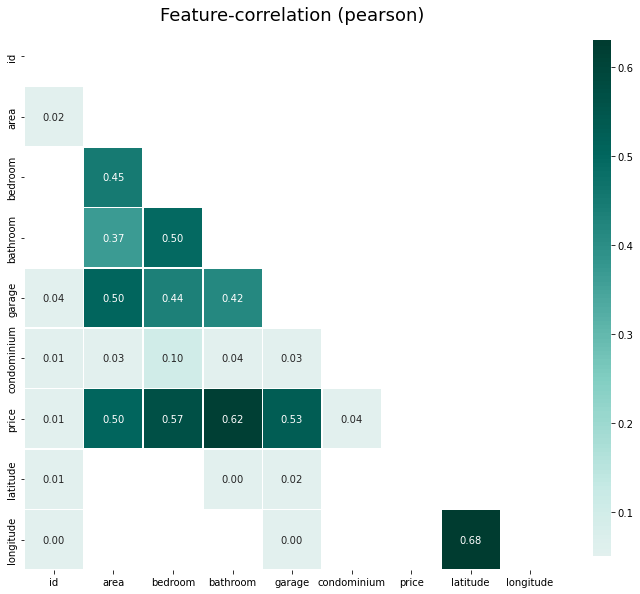

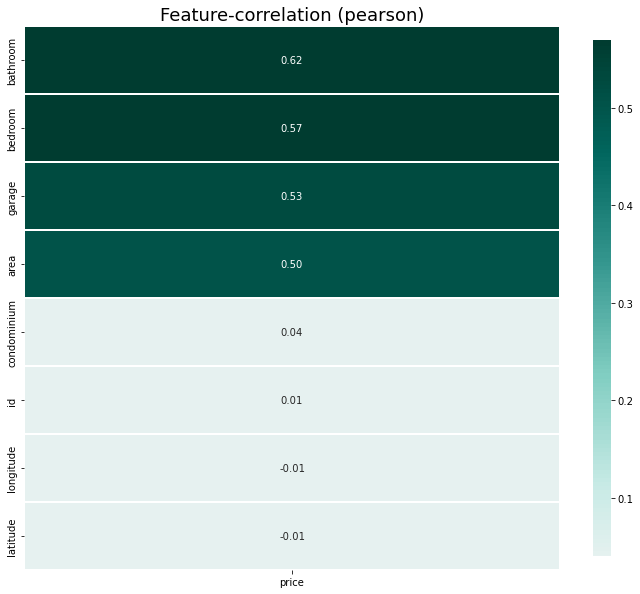

In [59]:
# Criando um gráfico de correlação das features do dataframe
klib.corr_plot(train_set_df)
klib.corr_plot(train_set_df, split='pos')
# klib.corr_plot(train_set_df, split='neg')
klib.corr_plot(train_set_df, target='price')

In [64]:
# Mostrando os valores de correlação entre as features do dataframe e o preço
correlation_matrix['price'].sort_values(ascending = False)

price          1.000000
bathroom       0.618355
bedroom        0.566592
garage         0.528112
area           0.502783
condominium    0.037250
id             0.007396
longitude     -0.005600
latitude      -0.008520
Name: price, dtype: float64

array([[<AxesSubplot:xlabel='price', ylabel='price'>,
        <AxesSubplot:xlabel='bathroom', ylabel='price'>,
        <AxesSubplot:xlabel='bedroom', ylabel='price'>,
        <AxesSubplot:xlabel='garage', ylabel='price'>,
        <AxesSubplot:xlabel='area', ylabel='price'>],
       [<AxesSubplot:xlabel='price', ylabel='bathroom'>,
        <AxesSubplot:xlabel='bathroom', ylabel='bathroom'>,
        <AxesSubplot:xlabel='bedroom', ylabel='bathroom'>,
        <AxesSubplot:xlabel='garage', ylabel='bathroom'>,
        <AxesSubplot:xlabel='area', ylabel='bathroom'>],
       [<AxesSubplot:xlabel='price', ylabel='bedroom'>,
        <AxesSubplot:xlabel='bathroom', ylabel='bedroom'>,
        <AxesSubplot:xlabel='bedroom', ylabel='bedroom'>,
        <AxesSubplot:xlabel='garage', ylabel='bedroom'>,
        <AxesSubplot:xlabel='area', ylabel='bedroom'>],
       [<AxesSubplot:xlabel='price', ylabel='garage'>,
        <AxesSubplot:xlabel='bathroom', ylabel='garage'>,
        <AxesSubplot:xlabel='bedro

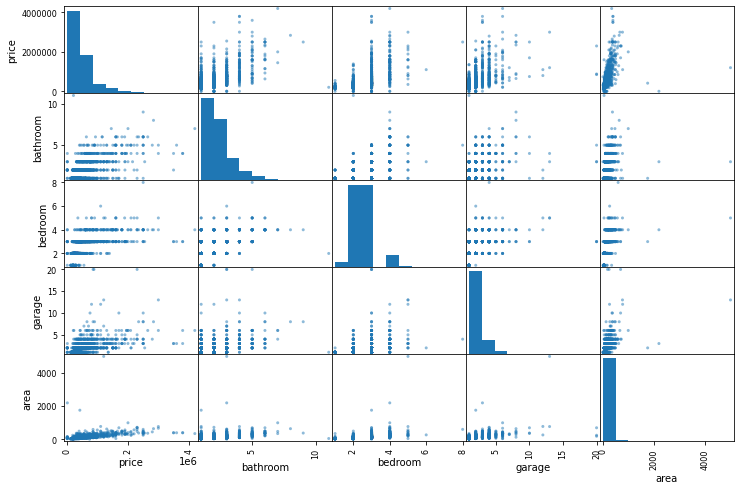

In [69]:
# Selecionando atributos (features) de interesse para plotar o gráfico de dispersão de correlação
attributes = ["price", "bathroom", "bedroom", "garage", "area"]

scatter_matrix(train_set_df[attributes], figsize=(12, 8))

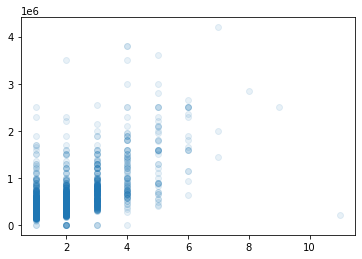

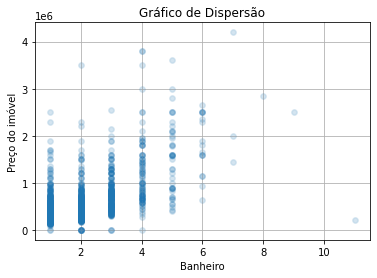

In [71]:
plt.scatter(train_set_df['bathroom'], train_set_df['price'], alpha = 0.1)
train_set_df.plot(kind="scatter", x="bathroom", y="price",
alpha=0.1)

# Gráfico usando plt.plot
x = train_set_df['bathroom']
y = train_set_df['price']
plt.plot(x, y, 'o', alpha = 0.1)
plt.xlabel('Banheiro')
plt.ylabel('Preço do imóvel')
plt.title('Gráfico de Dispersão')
plt.grid()

In [73]:
# Criando nova feature bathroom_per_bedroom (quantidade de banheiros por quarto) e verificando se a correlação entre ela e o preço está satisfatória
train_set_df['bathroom_per_bedroom'] = train_set_df['bathroom']/train_set_df['bedroom']

correlation_matrix_new = train_set_df.corr()
correlation_matrix_new['price'].sort_values(ascending = False)

price                1.000000
bathroom             0.618355
bedroom              0.566592
garage               0.528112
area                 0.502783
bedrooms_per_room    0.332517
condominium          0.037250
id                   0.007396
longitude           -0.005600
latitude            -0.008520
Name: price, dtype: float64